## TS02: Algoritmo para calcular la DFT

Author: Juan Chirino
Date: 13/04/2025

### Consigna

Desarrollar un algoritmo que calcule la transformada discreta de Fourier (DFT).

$$ X_{[k]} = \sum_{n=0}^{N-1}x_n \cdot e^{-j2 \pi .k.n/N}$$

```
XX = mi_funcion_DFT( xx )

xx: señal a analizar, una matriz (Nx1) de números reales. 

XX: DFT de xx, una matriz (Nx1) de números complejos.

In [45]:
"""
TPS02 -  Implementacion de la DFT 

El siguiente script Implementa la trasformada discreta de fourier apartir de 
un vector de muestras de entrada de longitud N. devolvera un vector de

    Xk=∑_(n=0)^(N−1)xn.e−j2π.k.n/N

    Como referencia ver ->https://www.youtube.com/watch?v=kjRkHIeb5eI

Created on Sat Apr 12 20:35:16 2025

@author: jchirino
"""

import numpy as np
import matplotlib.pyplot as plt


#Funcion para calcular la DFT apartir del vector de muestras xx
def func_DFT(xx): 

    N_sample = len(xx)
    nn = np.arange(0,N_sample,1)
   
    #genero la DFT apartir del producto interno entre el vector de muestas xx
    # y el vector de Twiddle factors ww_factors, tuve que calcular el primer
    # elemento a pata porque me tiraba un "NameError: name 'XX' is not defined"

    ww_factor = np.cos(2*np.pi*nn*0/N_sample) + 1j*np.sin(2*np.pi*nn*0/N_sample)
    XX = np.sum(xx*ww_factor)    
    
    
    for k in range(1,N_sample):
        #Genero el vector de Twiddle factors
        ww_factor = np.cos(2*np.pi*nn*k/N_sample) + 1j*np.sin(2*np.pi*nn*k/N_sample)
        XX = np.append( XX ,np.sum(xx*ww_factor))
    
    return XX

#Extraido de TS01 - Funcion para gegerar las muestras del Conversor A/D
def func_sen(A_max, DC_offset, Freq, Phase, N_sample, Fs):
    
    Ts = 1/Fs
    tt = np.arange(0,N_sample*Ts, Ts)
    xx = A_max * np.sin(2 * np.pi * Freq * tt + Phase) + DC_offset
    
    return xx

### Ejemplo de Funcionamiento

Para probar su funcionamiento se crea un vector de muestras de una señal senoidal con el scipt de la TS01

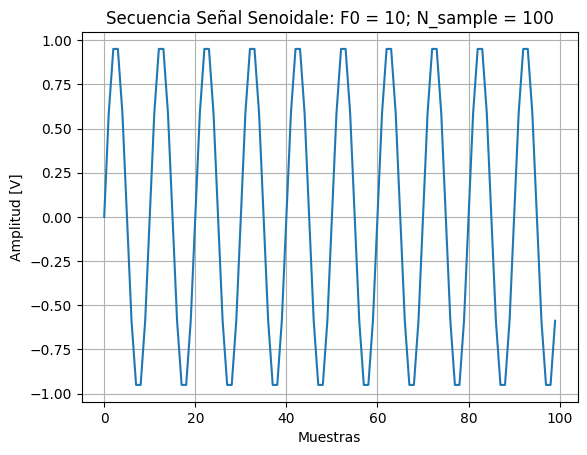

In [38]:
##Ejemplo de uso

N_sample = 100
Fs = N_sample
F_0= 10 

#genero N_sample muestras de una senoidal
#Freq = F_0 Hz, 1V de amplitud, muestreada Fs=N_sample
xx = func_sen(1,0,F_0,0,N_sample,Fs)

#Muestro las muestras de la señal
plt.figure(1)
plt.plot(np.arange(0,len(xx),1),xx)
plt.title(f'Secuencia Señal Senoidale: F0 = {F_0}; N_sample = {N_sample}')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [V]')
plt.grid()

Ahora comparamos el recultado de la DFT implenetada con un algoritmo propio (`XX_dft`) y la FFT provista por la libreria Numpy (`XX_fft`)

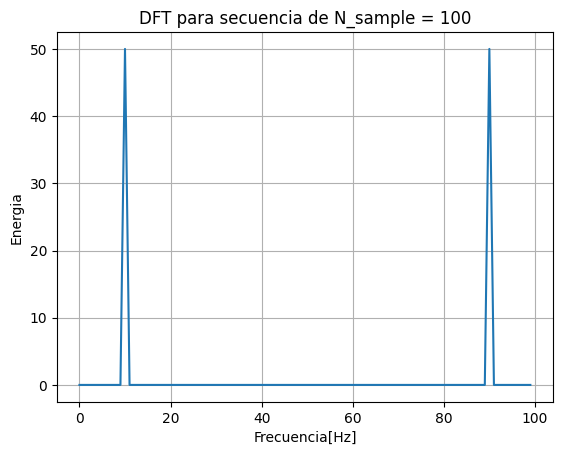

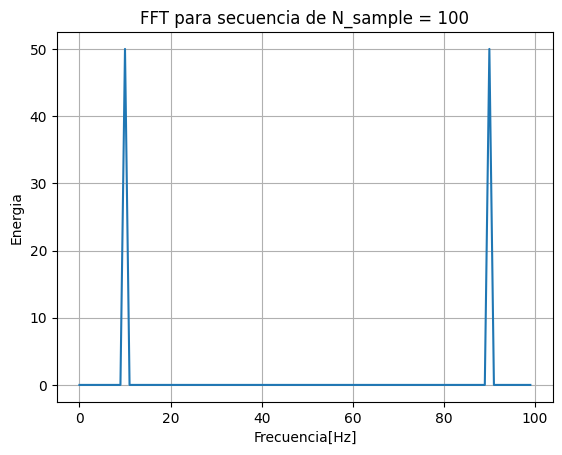

In [41]:
##Calculo de la DFT y la FFT de la secuencia de muestras generada

XX_dft = func_DFT(xx)

XX_fft = np.fft.fft(xx)

#Muestro el resultado de la DFT
plt.figure(2)
plt.plot(np.arange(0,len(XX_dft),1),abs(XX_dft))
plt.title(f'DFT para secuencia de N_sample = {N_sample}')
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Energia')
plt.grid()


plt.figure(3)
plt.plot(np.arange(0,len(XX_fft),1),abs(XX_fft))
plt.title(f'FFT para secuencia de N_sample = {N_sample}')
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Energia')
plt.grid()

Se puede ver que son identicas, exploremos que tan parecidas son calculando el error cometido con el algoritmo de DFT implementado, se toma como valor verdadero el que se obtiene al calcular la FFT con la libreria Numpy es decir:

$$ \varepsilon_r = \frac{|DFT\{x\}|-|FFT\{x\}|}{|FFT\{x\}|}$$

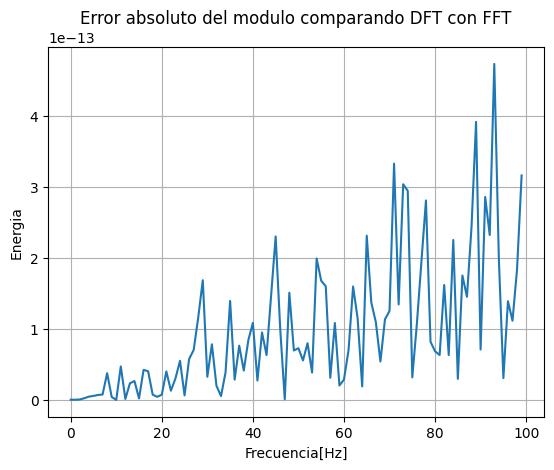

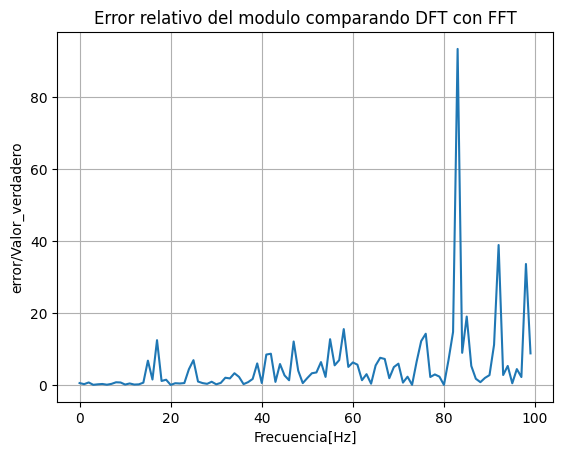

In [46]:
#Comparo los resultados
XX_error_abs = abs(XX_dft) - abs(XX_fft)
XX_error_rel = (abs(XX_dft) - abs(XX_fft)) / abs(XX_fft)

#Muestro el error al calcularl a FT con distintos metodos
#error absoluto del modulo
plt.figure(4)
plt.plot(np.arange(0,len(XX_error_abs),1),abs(XX_error_abs))
plt.title('Error absoluto del modulo comparando DFT con FFT')
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Energia')
plt.grid()

#error porcentual del modulo
plt.figure(5)
plt.plot(np.arange(0,len(XX_error_porc),1),abs(XX_error_porc))
plt.title('Error relativo del modulo comparando DFT con FFT')
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('error/Valor_verdadero')
plt.grid()

Me sorprendio que el error relativo supero amplimente las 80 unidades en algunas frecuencias, esto se deve a que se esta diviendo por un numero muuuuy cercano a cero al tomar como referencia el valor de la FFT para freciuencias distintas de . 

Para este caso conviene quedarse con el error absoluto. 